In [23]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ODE

## Ejercicio 1
$y'= -5y+5t^2+2t$
* $0 \le t \le 1$
* $y(t_0)=1/3$
* $N=10$



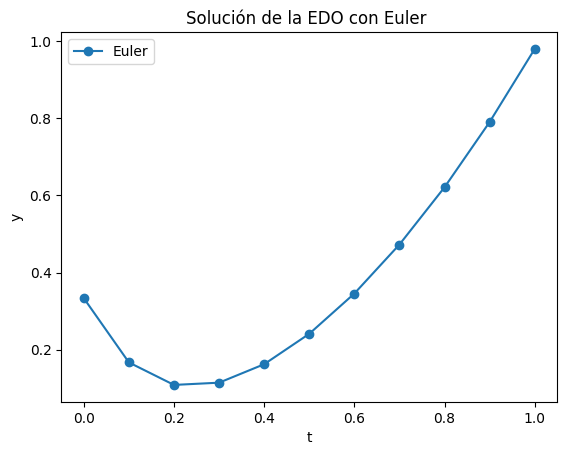

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from src import ODE_euler

def f(t, y):
    return -5 * y + 5 * t**2 + 2 * t

a = 0
b = 1
y_t0 = 1/3
N = 10

# Resolver con Euler
ys, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)

ts_real = np.linspace(a, b, 100)

# Graficar ambas soluciones
plt.plot(ts, ys, 'o-', label="Euler")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Solución de la EDO con Euler ")
plt.legend()
plt.show()

## Comparación con la solución real
La solución real de la ecuación diferencial es:
$y(t)=t^2 +1/3e^{-5t}$

* Grafique la solución real y la aproximación obtenida con el método de Euler en una misma gráfica.



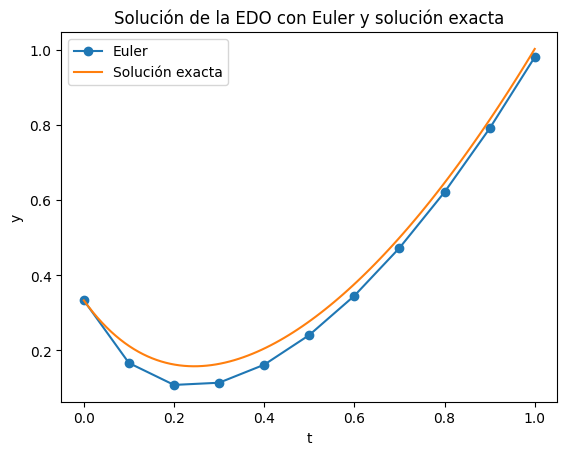

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from src import ODE_euler

# Definir la función de la EDO
def f(t, y):
    return -5 * y + 5 * t**2 + 2 * t

a = 0
b = 1
y_t0 = 1/3
N = 10

# Resolver con Euler
ys, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)

# Solución exacta
def y_real(t):
    return t**2 + (1/3) * np.exp(-5*t)

ts_real = np.linspace(a, b, 100)
ys_real = y_real(ts_real)

# Graficar ambas soluciones
plt.plot(ts, ys, 'o-', label="Euler")
plt.plot(ts_real, ys_real, label="Solución exacta")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Solución de la EDO con Euler y solución exacta")
plt.legend()
plt.show()

# Errores
Calcule el error relativo para diferentes valores de N.

In [15]:
import numpy as np
from src import ODE_euler

# Solución exacta
def y_real(t):
    return t**2 + (1/3) * np.exp(-5*t)

a = 0
b = 1
y_t0 = 1/3

Ns = [5, 10, 20]
errores_prom = []

for N in Ns:
    ys, ts, h = ODE_euler(a=a, b=b, f=lambda t, y: -5*y + 5*t**2 + 2*t, y_t0=y_t0, N=N)
    ys_exactos = y_real(np.array(ts))
    errores_relativos = np.abs((np.array(ys) - ys_exactos) / ys_exactos)
    error_prom = np.mean(errores_relativos)
    errores_prom.append(error_prom)

# Mostrar resultados
for N, err in zip(Ns, errores_prom):
    print(f"N={N:3d}  Error relativo promedio={err:.6f}")



N=  5  Error relativo promedio=0.279791
N= 10  Error relativo promedio=0.129095
N= 20  Error relativo promedio=0.063146
